In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot
import seaborn as sns 
%matplotlib inline

In [3]:
df=pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


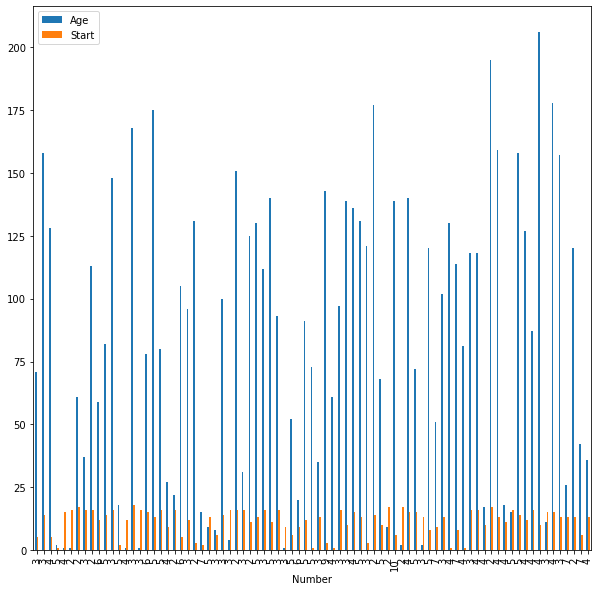

In [15]:
df.plot('Number',kind='bar',figsize=(10,10))

In [22]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

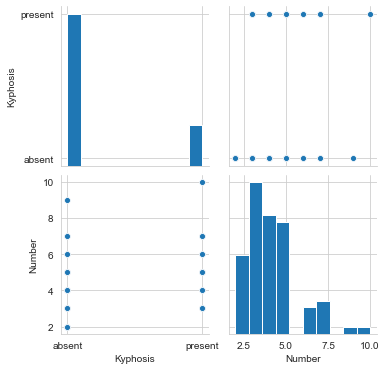

In [32]:
sns.set_style('whitegrid')
sns.pairplot(df,vars=['Kyphosis','Number'])

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [61]:
X_train.count()

Age       56
Number    56
Start     56
dtype: int64

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree=DecisionTreeClassifier()

In [64]:
X_train.shape,y_train.shape

((56, 3), (56,))

In [63]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
prediction=tree.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report

In [69]:
prediction,y_test

(array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
        'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
        'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
        'absent', 'absent', 'absent', 'present', 'absent', 'absent',
        'present'], dtype=object),
 66     absent
 50     absent
 3      absent
 16     absent
 29     absent
 80     absent
 70     absent
 59     absent
 10    present
 67     absent
 35     absent
 19     absent
 5      absent
 65     absent
 55     absent
 48    present
 74     absent
 15     absent
 31     absent
 69     absent
 76    present
 57    present
 27     absent
 56     absent
 37    present
 Name: Kyphosis, dtype: object)

In [70]:
print(confusion_matrix(y_test,prediction))


[[19  1]
 [ 3  2]]


In [71]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        20
     present       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25



In [72]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf=RandomForestClassifier(n_estimators=100)

In [83]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 45 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     56 non-null     int64
 1   Number  56 non-null     int64
 2   Start   56 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [81]:
type(X_train)

pandas.core.frame.DataFrame

In [86]:
prediction=rf.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix,classification_report

In [89]:
print(confusion_matrix(y_test,prediction))

[[20  0]
 [ 4  1]]


In [90]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.91        20
     present       1.00      0.20      0.33         5

    accuracy                           0.84        25
   macro avg       0.92      0.60      0.62        25
weighted avg       0.87      0.84      0.79        25

